# Zadanie 3 - drzewa decyzyjne

In [58]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

In [59]:
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
clf.predict(iris.data[:1, :])

array([0])

In [61]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [62]:
from sklearn.externals.six import StringIO  
import pydot 

In [63]:
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf")

# Zadanie - klasyfikacja cyfr

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

In [65]:
# Load data
dane = loadmat('baza_mnist.mat')

In [66]:
# Zad 1. Extract features and labels 
X = dane['X']
y = dane['y']

In [67]:
# Standaryzacja
for i in range(X.shape[0]):
    X[i, :] = X[i, :] / np.std(X[i, :])

In [68]:
# Replace every 10 to 0 (error in data)   
y[np.where(y==10)]=0

In [69]:
# wysokość i szerokość obrazka z cyfrą 
h = 20
w = 20

In [70]:
# Zad 2. Number of pixels per one image
print('Number of digits: {}'.format(np.bincount(y[:, 0]).shape[0]))
print('Amount of pixels per one image: {}'.format(X.shape[1]))

Number of digits: 10
Amount of pixels per one image: 400


In [71]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i, :].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(str(titles[i]), size=12)
        plt.xticks(())
        plt.yticks(())

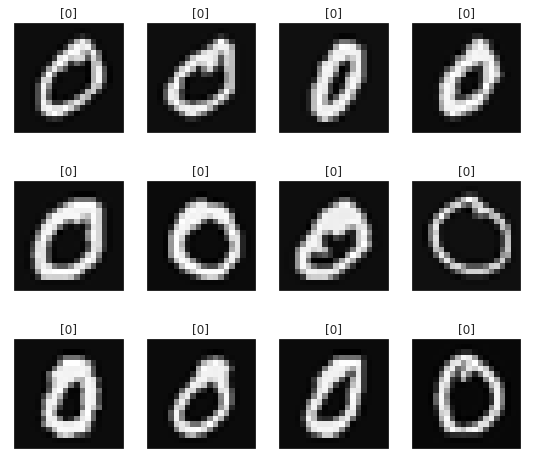

In [72]:
# Zad 3
plot_mnist(X, y, h, w)

In [73]:
# Zad. 4
# Split data on training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [74]:
# Zad. 5
# Create classifier
DEPTH = 10
tree_classifier = tree.DecisionTreeClassifier(max_depth=DEPTH)

# Learning
tree_classifier.fit(X=X_train, y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
# Save tree structure to pdf
dot_data = StringIO() 
tree.export_graphviz(tree_classifier, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("mnist.pdf")

In [76]:
# Prediction
predictions = tree_classifier.predict(X=X_test)

In [77]:
# Accuracy
accuracy_score(y_true=y_test, y_pred=predictions)

0.776

In [78]:
# Classification report
print(classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       149
           1       0.78      0.86      0.82       133
           2       0.74      0.70      0.72       148
           3       0.69      0.75      0.72       174
           4       0.82      0.76      0.79       141
           5       0.66      0.65      0.66       141
           6       0.86      0.76      0.81       165
           7       0.82      0.80      0.81       142
           8       0.70      0.76      0.73       150
           9       0.81      0.83      0.82       157

   micro avg       0.78      0.78      0.78      1500
   macro avg       0.78      0.78      0.78      1500
weighted avg       0.78      0.78      0.78      1500



In [79]:
# F1 score
f1_scores_per_class = f1_score(y_true=y_test, y_pred=predictions, average=None)
for i, score in enumerate(f1_scores_per_class):
    print('F1 score for {} is {}'.format(i, score))

F1 score for 0 is 0.8956228956228955
F1 score for 1 is 0.8172043010752688
F1 score for 2 is 0.7197231833910034
F1 score for 3 is 0.7182320441988951
F1 score for 4 is 0.7896678966789668
F1 score for 5 is 0.6571428571428573
F1 score for 6 is 0.8076923076923076
F1 score for 7 is 0.8100358422939068
F1 score for 8 is 0.7284345047923323
F1 score for 9 is 0.8238993710691824


In [80]:
# Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=predictions)

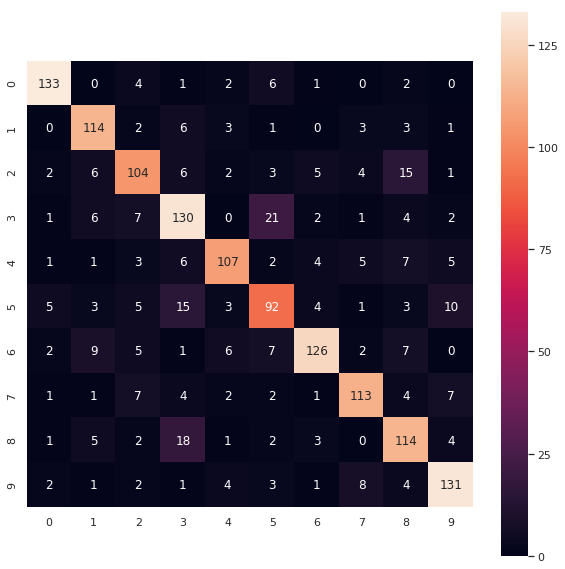

In [81]:
# Pretty print confusion matrix using seaborn package
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(data=cm, annot=True, fmt='g', square=True)